## Przygotowanie danych z pliku .csv

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import table

In [2]:
sales = pd.read_csv("vgsales.csv")
sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Unnamed: 11
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NaN
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NaN
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26,NaN
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,NaN
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,NaN
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,NaN
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN


In [3]:
sales.drop('Unnamed: 11', inplace = True, axis = 1)
sales.drop('Rank', inplace = True, axis = 1)
print(sales.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [4]:
sales.count()

Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16337
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [5]:
sales_data = sales.dropna()
sales_data.count()

Name            16191
Platform        16191
Year            16191
Genre           16191
Publisher       16191
NA_Sales        16191
EU_Sales        16191
JP_Sales        16191
Other_Sales     16191
Global_Sales    16191
dtype: int64

In [6]:
sales_data.tail(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.0,0.00,0.01,0.0,0.01
16590,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.0,0.00,0.01,0.0,0.01
16591,Myst IV: Revelation,PC,2004,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.0,0.00,0.00,0.0,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.0,0.01,0.00,0.0,0.01
16597,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [7]:
sales_cleaned = sales_data.drop(sales_data[sales_data.Global_Sales < 0.1].index)
sales_cleaned.count()

Name            10592
Platform        10592
Year            10592
Genre           10592
Publisher       10592
NA_Sales        10592
EU_Sales        10592
JP_Sales        10592
Other_Sales     10592
Global_Sales    10592
dtype: int64

In [8]:
sales_cleaned.rename(columns = {'NA_Sales' : 'NA_Sales_Mln', 'EU_Sales' : 'EU_Sales_Mln', 'JP_Sales': 'JP_Sales_Mln', 
                                  'Other_Sales': 'Other_Sales_Mln', 'Global_Sales': 'Global_Sales_Mln'}, inplace = True)
print(sales_cleaned.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales_Mln',
       'EU_Sales_Mln', 'JP_Sales_Mln', 'Other_Sales_Mln', 'Global_Sales_Mln'],
      dtype='object')


In [9]:
sales_cleaned.dtypes

Name                 object
Platform             object
Year                 object
Genre                object
Publisher            object
NA_Sales_Mln         object
EU_Sales_Mln        float64
JP_Sales_Mln        float64
Other_Sales_Mln     float64
Global_Sales_Mln    float64
dtype: object

In [10]:
sales_cleaned['NA_Sales_Mln'] = pd.to_numeric(sales_cleaned['NA_Sales_Mln'])
sales_cleaned['Year'] = pd.to_numeric(sales_cleaned['Year'])
sales_cleaned.dtypes

Name                 object
Platform             object
Year                  int64
Genre                object
Publisher            object
NA_Sales_Mln        float64
EU_Sales_Mln        float64
JP_Sales_Mln        float64
Other_Sales_Mln     float64
Global_Sales_Mln    float64
dtype: object

In [11]:
sales_frame = pd.DataFrame(sales_cleaned)
print(sales_frame)

                                  Name Platform  Year         Genre  \
0                           Wii Sports      Wii  2006        Sports   
1                    Super Mario Bros.      NES  1985      Platform   
2                       Mario Kart Wii      Wii  2008        Racing   
3                    Wii Sports Resort      Wii  2009        Sports   
4             Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
...                                ...      ...   ...           ...   
10812  Minority Report: Everybody Runs       XB  2002        Action   
10813                         MindJack     X360  2011       Shooter   
10814                           ReCore     XOne  2016        Action   
10815                           NASCAR      PSP  2006        Racing   
10816                           Halo 2       PC  2007       Shooter   

                    Publisher  NA_Sales_Mln  EU_Sales_Mln  JP_Sales_Mln  \
0                    Nintendo         41.49         29.02          3.77 

## Analiza ogólnej sprzedaży

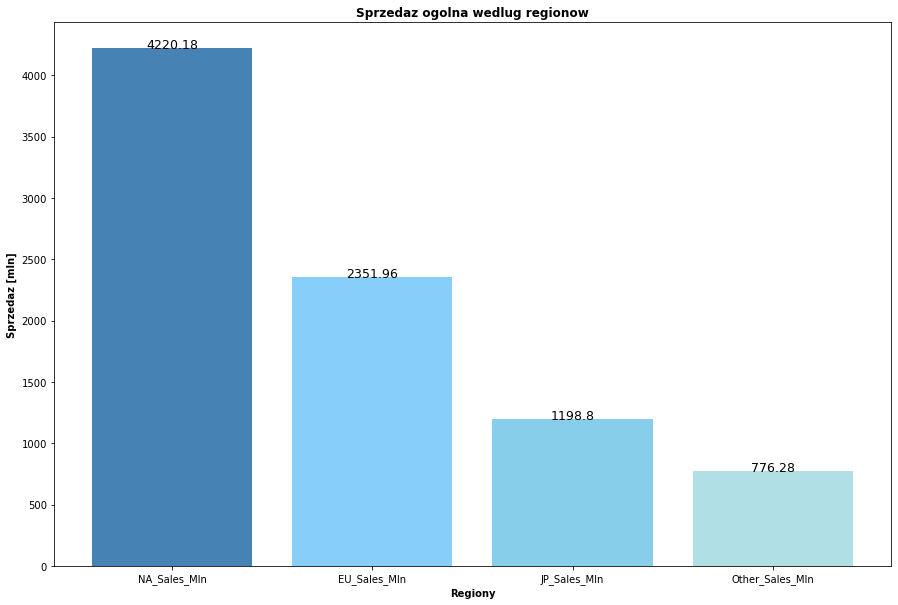

In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']
    y = sales_frame[['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']].sum().round(decimals=2).\
        sort_values(ascending=False)

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['steelblue','lightskyblue', 'skyblue', 'powderblue'])
addlabels(x,y)
plt.title("Sprzedaz ogolna wedlug regionow", fontweight='bold')
plt.xlabel("Regiony", fontweight='bold')
plt.ylabel("Sprzedaz [mln]", fontweight='bold')

plt.show()

#### Powyższy wykres słupkowy przedstawia ogólną sprzedaż gier podzieloną według regionów - Ameryka północna, Europa, Japonia oraz reszta świata. Jak można zauważyć największy zysk ze sprzedaży gier odnotowała Ameryka północna 4.220.180.000. Na drugim miejscu znajduje się Europa z prawie dwukrotnie niższym dochodem. Na wykresie zauważyć można, że także zysk Japonii jest prawie dwukrotnie niższy od dochodu Europy.

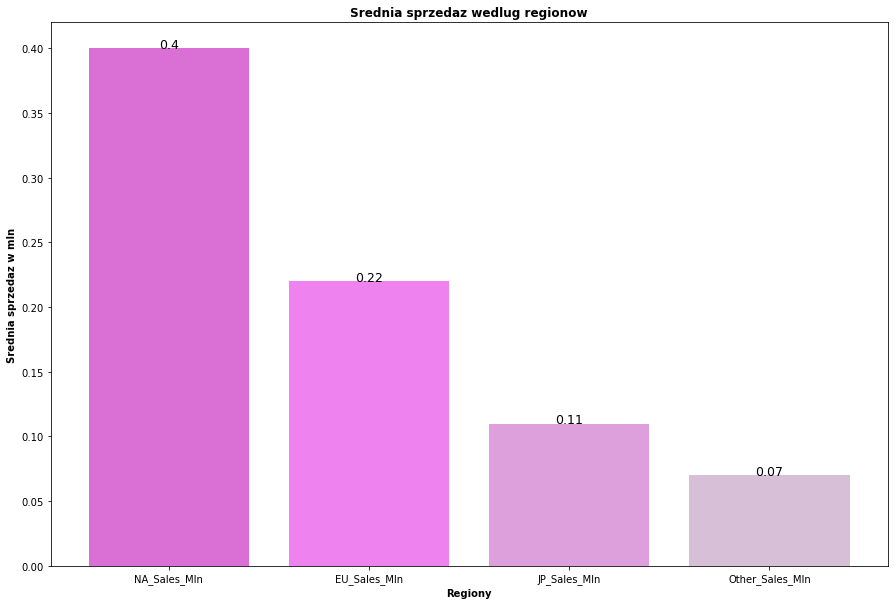

In [13]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']
    y = sales_frame[['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']].mean().round(decimals=2)

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['orchid','violet', 'plum', 'thistle'])
addlabels(x,y)
plt.title("Srednia sprzedaz wedlug regionow", fontweight='bold')
plt.xlabel("Regiony", fontweight='bold')
plt.ylabel("Srednia sprzedaz w mln", fontweight='bold')

plt.show()

#### Wykres przedstawia średnie dochody ze sprzedaży gier w poszczególnych regionach. Tak jak w przypadku ogólnych dochodów tak i średnie zyski regionów różnią się w podobnym stopniu jak ogólne zyski. Najwyższą średnią sprzedaż odnotowała Ameryka, na drugim miejscu znajduje się Europa z dwukrotnie niższym zyskiem. Średni zysk Japonii jest prawie czterokrotnie niższy od dochodu Ameryki oraz dwukrotnie niższy od średniego zysku Europy.

In [14]:
decade1_frame = sales_frame.loc[(sales_frame['Year'] >= 1980) & (sales_frame['Year'] <= 1989)]
print(decade1_frame.tail(50).sort_values(by=['Year'], ascending = False))

                         Name Platform  Year      Genre  \
8757                     Klax     2600  1989     Puzzle   
6939                  Rampage     2600  1988     Action   
6583            Desert Falcon     2600  1987    Shooter   
5082                  Solaris     2600  1986    Shooter   
5956        RealSports Boxing     2600  1986     Sports   
4727                  Dig Dug      NES  1985     Puzzle   
6296                Beamrider     2600  1984     Racing   
4780                    Pengo     2600  1983  Adventure   
5559  Frogger II: Threeedeep!     2600  1983     Action   
8457         Mr. Do!'s Castle     2600  1983     Action   
5382                Frostbite     2600  1983     Action   
6007                  Dolphin     2600  1983     Action   
6265                  Mr. Do!     2600  1982     Action   
6145                  Polaris     2600  1982     Action   
7149                  Assault     2600  1982     Action   
5773            Mountain King     2600  1982     Action 

In [15]:
decade2_frame = sales_frame.loc[(sales_frame['Year'] >= 1990) & (sales_frame['Year'] <= 1999)]
decade3_frame = sales_frame.loc[(sales_frame['Year'] >= 2000) & (sales_frame['Year'] <= 2009)]
decade4_frame = sales_frame.loc[sales_frame['Year'] >= 2010]

#decade2_frame['Year'].value_counts()
#decade3_frame['Year'].value_counts()
#decade4_frame['Year'].value_counts()

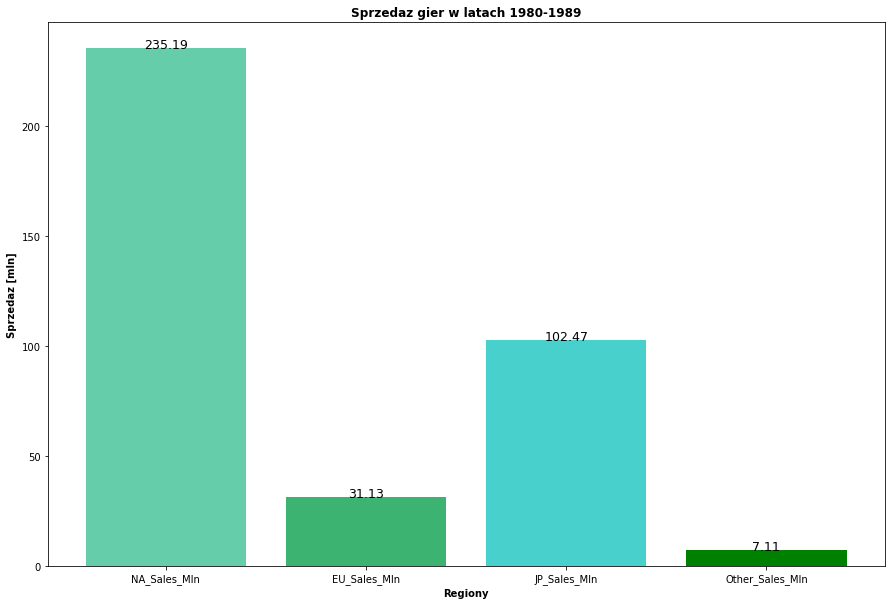

In [16]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']
    y = decade1_frame[['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']].sum().round(decimals=2)

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['mediumaquamarine', 'mediumseagreen', 'mediumturquoise', 'green'])
addlabels(x,y)
plt.title("Sprzedaz gier w latach 1980-1989", fontweight='bold')
plt.xlabel("Regiony", fontweight='bold')
plt.ylabel("Sprzedaz [mln]", fontweight='bold')

plt.show()

#### Powyższy wykres przedstawia sprzedaż gier w latach 1980-1989 w podziale na regiony. Największy przychód ze sprzedaży odnotowała Ameryka Północna, przewyższając ponad dwukrotnie Japonię oraz prawie osmiokrotnie Europę. Najmniejszy zysk osiągnęła reszta świata.

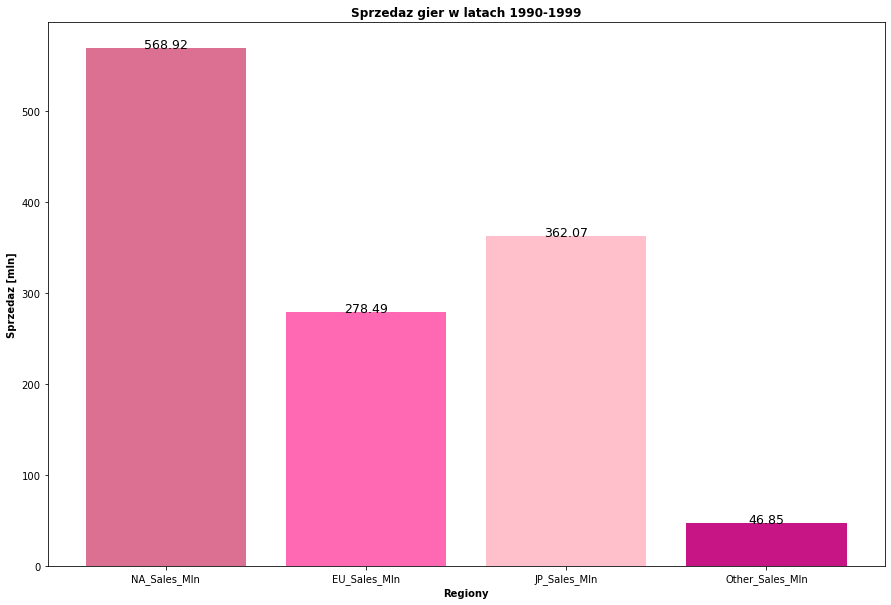

In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']
    y = decade2_frame[['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']].sum().round(decimals=2)

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['palevioletred', 'hotpink', 'pink', 'mediumvioletred'])
addlabels(x,y)
plt.title("Sprzedaz gier w latach 1990-1999", fontweight='bold')
plt.xlabel("Regiony", fontweight='bold')
plt.ylabel("Sprzedaz [mln]", fontweight='bold')

plt.show()

#### W latach 1990-1999 na pierwszym miejscu ponownie znajduje się Ameryka Północna znacznie przewyższając dochód pozostałych regionów. Na wykresie zauważyć również można, że zysk ze sprzedaży w Europie, Japonii oraz reszcie świata znacznie wzrósł w porównaniu z poprzednią dekadą, jednak dochód Europy jest nadal niższy od zysku Japonii w tej dekadzie.

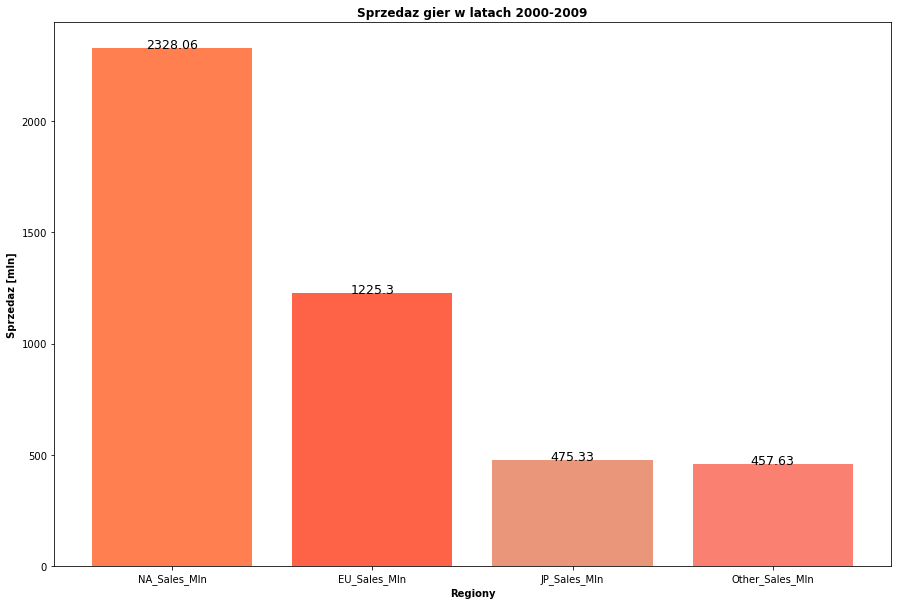

In [18]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']
    y = decade3_frame[['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']].sum().round(decimals=2)

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['coral', 'tomato', 'darksalmon', 'salmon'])
addlabels(x,y)
plt.title("Sprzedaz gier w latach 2000-2009", fontweight='bold')
plt.xlabel("Regiony", fontweight='bold')
plt.ylabel("Sprzedaz [mln]", fontweight='bold')

plt.show()

#### Na wykresie przedstawiającym sprzedaż w latach 2000-2009 widać, iż Ameryka również w tej dekadzie jest na pierwszym miejscu. Zauważyć można również zmianę w zyskach Europy i Japonii, ponieważ Europa przewyżyszła w tej dekadzie Japonię prawie trzykrotnie. Zysk z pozostałej części świata wzrósł prawie dziesięciokrotnie.

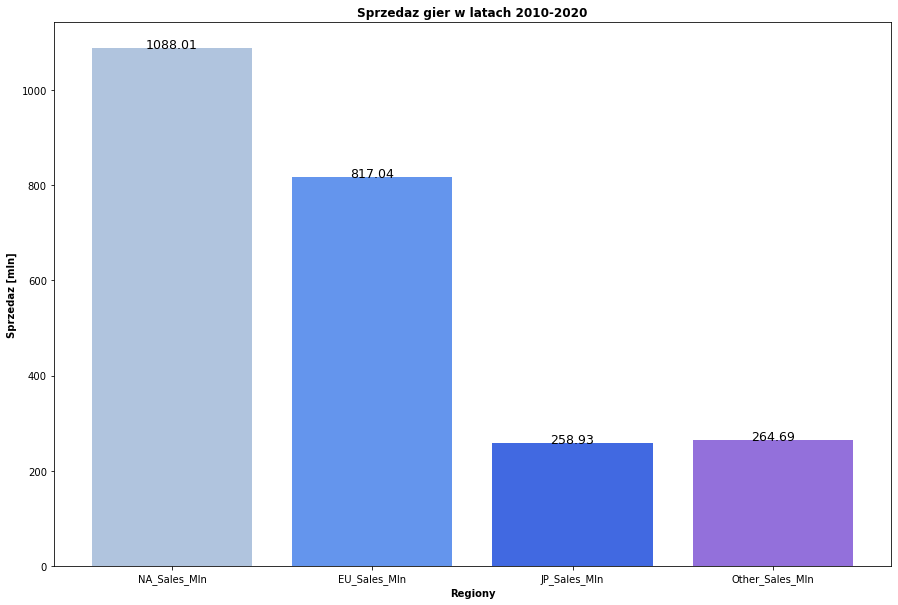

In [19]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']
    y = decade4_frame[['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln','Other_Sales_Mln']].sum().round(decimals=2)

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumpurple'])
addlabels(x,y)
plt.title("Sprzedaz gier w latach 2010-2020", fontweight='bold')
plt.xlabel("Regiony", fontweight='bold')
plt.ylabel("Sprzedaz [mln]", fontweight='bold')

plt.show()

#### Na powyższym wykresie widać, że zmiany które zaszły w poprzedniej dekadzie utrzymały się. W przypadku wysokości zysków nadal dominuje Ameryka Północna. Japonia odnotowała prawie trzykrotnie mniejszy zysk niż Europa. Na wykresie można zauważyć również, że Japonia odnotowała minimalnie niższy przychód niż zysk ze sprzedaży z pozostałej części świata.

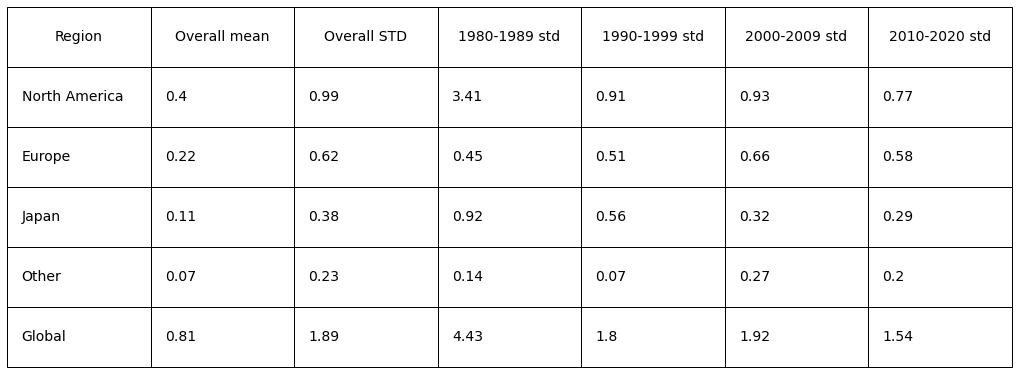

In [20]:
#sales_mean = sales_frame[['NA_Sales_Mln', 'EU_Sales_Mln', 'JP_Sales_Mln', 'Other_Sales_Mln', 'Global_Sales_Mln']].mean()
overall_mean = sales_frame.loc[:, sales_frame.columns != 'Year'].mean()
overall_std = sales_frame.loc[:, sales_frame.columns != 'Year'].std()
decade1_std = decade1_frame.loc[:, decade1_frame.columns != 'Year'].std()
decade2_std = decade2_frame.loc[:, decade2_frame.columns != 'Year'].std()
decade3_std = decade3_frame.loc[:, decade3_frame.columns != 'Year'].std()
decade4_std = decade4_frame.loc[:, decade4_frame.columns != 'Year'].std()

sales_std = {'Region': ['North America', 'Europe', 'Japan', 'Other', 'Global'],
             'Overall mean': overall_mean,
            'Overall STD': overall_std,
            '1980-1989 std': decade1_std,
            '1990-1999 std': decade2_std,
            '2000-2009 std': decade3_std,
            '2010-2020 std': decade4_std,}

std_table = pd.DataFrame(sales_std).round(decimals = 2)



ax = plt.subplot()
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=std_table.values, colLabels=std_table.columns, loc='center', cellLoc='left')
table.scale(3,5)
table.set_fontsize(14)

plt.show()

#### Powyższa tabela przedstawia średnie zarobki, odchylenie standardowe od ogólnych zarboków oraz odchylenia standardowe według dekad. Ogólne odchylenie standardowe od średniej globalnych zarobków wynosi 1.89 miliona. W porównaniu do poszczególnych dekad niższe odchylenie standardowe zysku globalnego zauważyć można w latach 1990-1999 oraz 2010-2022. Odchylenie standardowe wraz z upływem lat stopniowo zmniejszało się w Japonii. Drastyczny spadek odchylenia standardowego można zauważyć w regionie Ameryki Północnej. W przypadku Europy odchylenie rosło przez kolejne dekady, jednak zmalało w latach 2010-2020.

## Analiza wydawców gier

In [21]:
sales_frame['Publisher'].value_counts().head(10)

Electronic Arts                 1162
Activision                       804
Ubisoft                          675
Nintendo                         636
THQ                              599
Sony Computer Entertainment      564
Namco Bandai Games               531
Konami Digital Entertainment     523
Sega                             451
Take-Two Interactive             329
Name: Publisher, dtype: int64

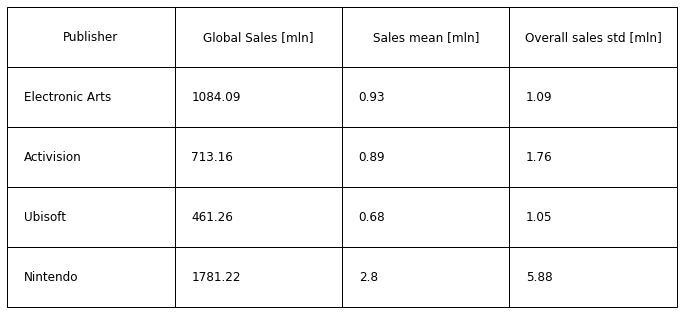

In [22]:
EA_sales = sales_frame[sales_frame['Publisher'] == 'Electronic Arts']['Global_Sales_Mln'].sum()
Activision_sales = sales_frame[sales_frame['Publisher'] == 'Activision']['Global_Sales_Mln'].sum()
Ubisoft_sales = sales_frame[sales_frame['Publisher'] == 'Ubisoft']['Global_Sales_Mln'].sum()
Nintendo_sales = sales_frame[sales_frame['Publisher'] == 'Nintendo']['Global_Sales_Mln'].sum()

EA_mean = sales_frame[sales_frame['Publisher'] == 'Electronic Arts']['Global_Sales_Mln'].mean()
Activision_mean = sales_frame[sales_frame['Publisher'] == 'Activision']['Global_Sales_Mln'].mean()
Ubisoft_mean = sales_frame[sales_frame['Publisher'] == 'Ubisoft']['Global_Sales_Mln'].mean()
Nintendo_mean = sales_frame[sales_frame['Publisher'] == 'Nintendo']['Global_Sales_Mln'].mean()

EA_std = sales_frame[sales_frame['Publisher'] == 'Electronic Arts']['Global_Sales_Mln'].std()
Activision_std = sales_frame[sales_frame['Publisher'] == 'Activision']['Global_Sales_Mln'].std()
Ubisoft_std = sales_frame[sales_frame['Publisher'] == 'Ubisoft']['Global_Sales_Mln'].std()
Nintendo_std = sales_frame[sales_frame['Publisher'] == 'Nintendo']['Global_Sales_Mln'].std()

publisher_list = {'Publisher': ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo'],
                  'Global Sales [mln]':[EA_sales, Activision_sales, Ubisoft_sales, Nintendo_sales],
                  'Sales mean [mln]': [EA_mean, Activision_mean, Ubisoft_mean, Nintendo_mean],
                 'Overall sales std [mln]': [EA_std, Activision_std, Ubisoft_std, Nintendo_std]}

publisher = pd.DataFrame(publisher_list).round(decimals = 2)

ax = plt.subplot()
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=publisher.values, colLabels=publisher.columns, loc='center', cellLoc='left')
table.scale(2,5)
table.set_fontsize(14)

plt.show()

#### Powyższa tablica przedstawia globalne zarobki 4 wydawców posiadających największą liczbę tytułów wraz z odchyleniem standardowym. Najwięcej wydanych gier posiada Electronic Arts, jednak wydawca ten nie odnotował największego zarobku. Największy dochód uzyskało Nintendo, które pod względem liczby wydanych gier jest na czwartym miejscu. Największe odchylenie standardowe zauważyć również można zauważyć w przypadku Nintendo - 5.88 miliona, najniższe natomiast odnotowało Ubisoft - 1.05 miliona, czyli ponad pięciokrotnie mniej.

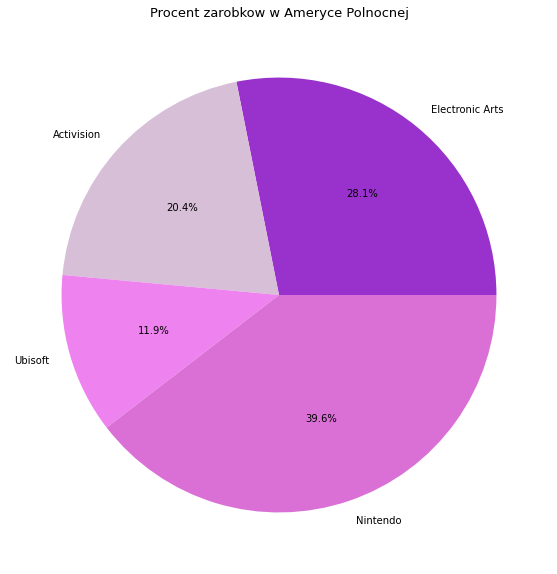

In [23]:
EA_na = sales_frame[sales_frame['Publisher'] == 'Electronic Arts']['NA_Sales_Mln'].sum()
Activision_na = sales_frame[sales_frame['Publisher'] == 'Activision']['NA_Sales_Mln'].sum()
Ubisoft_na = sales_frame[sales_frame['Publisher'] == 'Ubisoft']['NA_Sales_Mln'].sum()
Nintendo_na = sales_frame[sales_frame['Publisher'] == 'Nintendo']['NA_Sales_Mln'].sum()


publishers = ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo']
data = [EA_na, Activision_na, Ubisoft_na, Nintendo_na]
 
fig = plt.figure(figsize =(12, 10))
plt.pie(data, labels = publishers, 
        colors= ['darkorchid', 'thistle', 'violet', 'orchid'], autopct='%1.1f%%')

plt.title('Procent zarobkow w Ameryce Polnocnej', fontsize='13')
plt.show()

#### Powyższy wykres przedstawia podział zysków Ameryki Północnej . Prawie 40% zysków przyniosło Nintendo, niewiele mniej bo 28% odnotowało Electronic Arts. Najmniejszy udział w zyskach przyniosło Ubisoft.

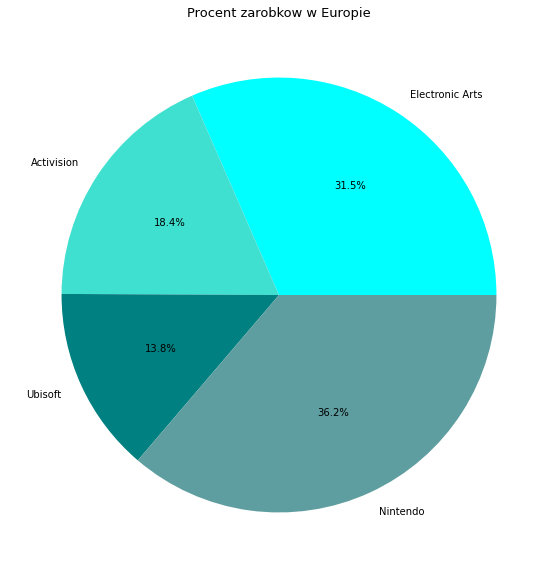

In [24]:
EA_eu = sales_frame[sales_frame['Publisher'] == 'Electronic Arts']['EU_Sales_Mln'].sum()
Activision_eu = sales_frame[sales_frame['Publisher'] == 'Activision']['EU_Sales_Mln'].sum()
Ubisoft_eu = sales_frame[sales_frame['Publisher'] == 'Ubisoft']['EU_Sales_Mln'].sum()
Nintendo_eu = sales_frame[sales_frame['Publisher'] == 'Nintendo']['EU_Sales_Mln'].sum()


publishers = ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo']
data = [EA_eu, Activision_eu, Ubisoft_eu, Nintendo_eu]
 
fig = plt.figure(figsize =(12, 10))
plt.pie(data, labels = publishers, 
        colors= ['aqua', 'turquoise', 'teal', 'cadetblue'], autopct='%1.1f%%')

plt.title('Procent zarobkow w Europie', fontsize='13')
plt.show()

#### Na powyższym wykresie zauważyć można, że zmiany w porównaniu do regionu Ameryki Północnej są niewielkie. Zmiany w dochodach wahają się na poziomie 2-3%.

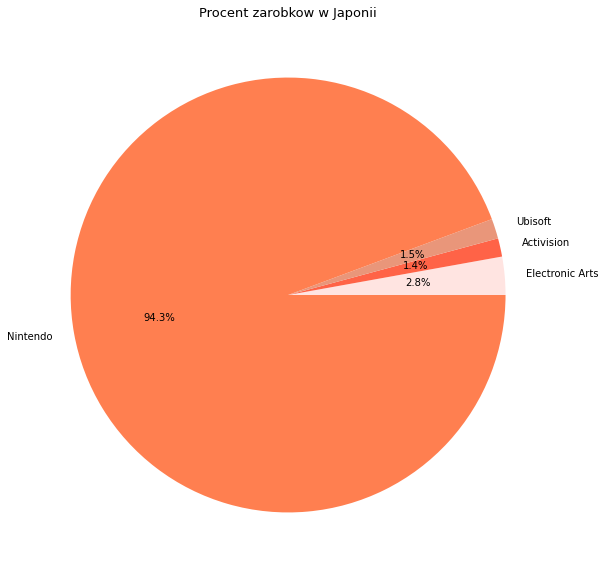

In [25]:
EA_jp = sales_frame[sales_frame['Publisher'] == 'Electronic Arts']['JP_Sales_Mln'].sum()
Activision_jp = sales_frame[sales_frame['Publisher'] == 'Activision']['JP_Sales_Mln'].sum()
Ubisoft_jp = sales_frame[sales_frame['Publisher'] == 'Ubisoft']['JP_Sales_Mln'].sum()
Nintendo_jp = sales_frame[sales_frame['Publisher'] == 'Nintendo']['JP_Sales_Mln'].sum()


publishers = ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo']
data = [EA_jp, Activision_jp, Ubisoft_jp, Nintendo_jp]
 
fig = plt.figure(figsize =(12, 10))
plt.pie(data, labels = publishers, 
        colors= ['mistyrose', 'tomato', 'darksalmon', 'coral'], autopct='%1.1f%%')

plt.title('Procent zarobkow w Japonii', fontsize='13')
plt.show()

#### Na powyższym wykresie zauważyć można, że w regionie Japonii procent zysków ze sprzedaży zdominowało Nintendo. Na drugim miejscu jest tak jak w poprzednich regionach Electronic Arts. Na trzecim miejscu natomiast znajduje się Ubisoft, które w regionie Ameryki oraz Europy znajdowało się na ostatnim miejscu.

## Analiza gatunków gier

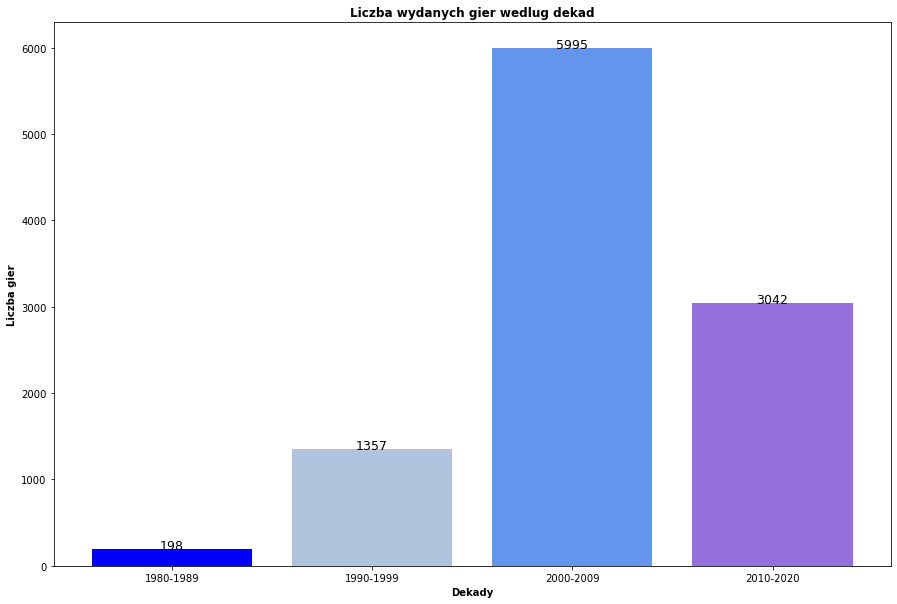

In [26]:
decade1_count = decade1_frame['Name'].count()
decade2_count = decade2_frame['Name'].count()
decade3_count = decade3_frame['Name'].count()
decade4_count = decade4_frame['Name'].count()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['1980-1989', '1990-1999', '2000-2009','2010-2020']
    y = [decade1_count, decade2_count, decade3_count, decade4_count]

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['blue', 'lightsteelblue', 'cornflowerblue', 'mediumpurple'])
addlabels(x,y)
plt.title("Liczba wydanych gier wedlug dekad", fontweight='bold')
plt.xlabel("Dekady", fontweight='bold')
plt.ylabel("Liczba gier", fontweight='bold')

plt.show()

#### Powyższy wykres przedstawia liczbę gier wydanych w poszczególnych dekadach. Jak można zauważyć najwięcej gier wydano w latach 2000-2009, prawie dwukrotnie mniej wydano w latach 2010-2020. Natomiast najmniej gier wydano w pierwszej dekadzie, ponad 30 razy mniej w porównaniu z latami 2000-2009.

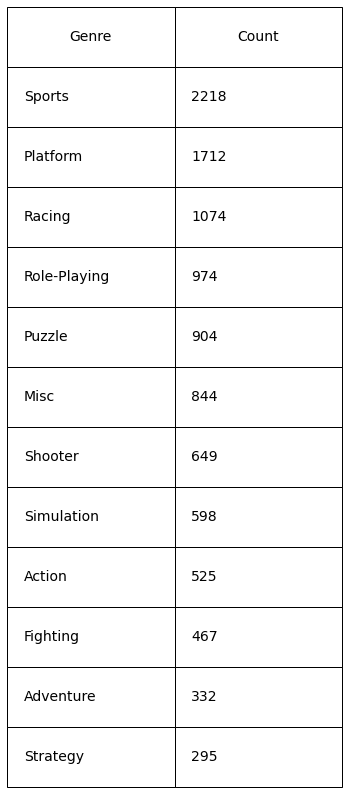

In [27]:
genre_count = sales_frame['Genre'].value_counts()
genre_type = sales_frame['Genre'].unique()

genre_data = {'Genre': genre_type,
              'Count': genre_count}
genre_frame = pd.DataFrame(genre_data)


ax = plt.subplot()
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=genre_frame.values, colLabels=genre_frame.columns, loc='center', cellLoc='left')
table.scale(1,5)
table.set_fontsize(14)

plt.show()


#### Powyższa tabela przedstawia liczebność poszczególnych gatunków gier.

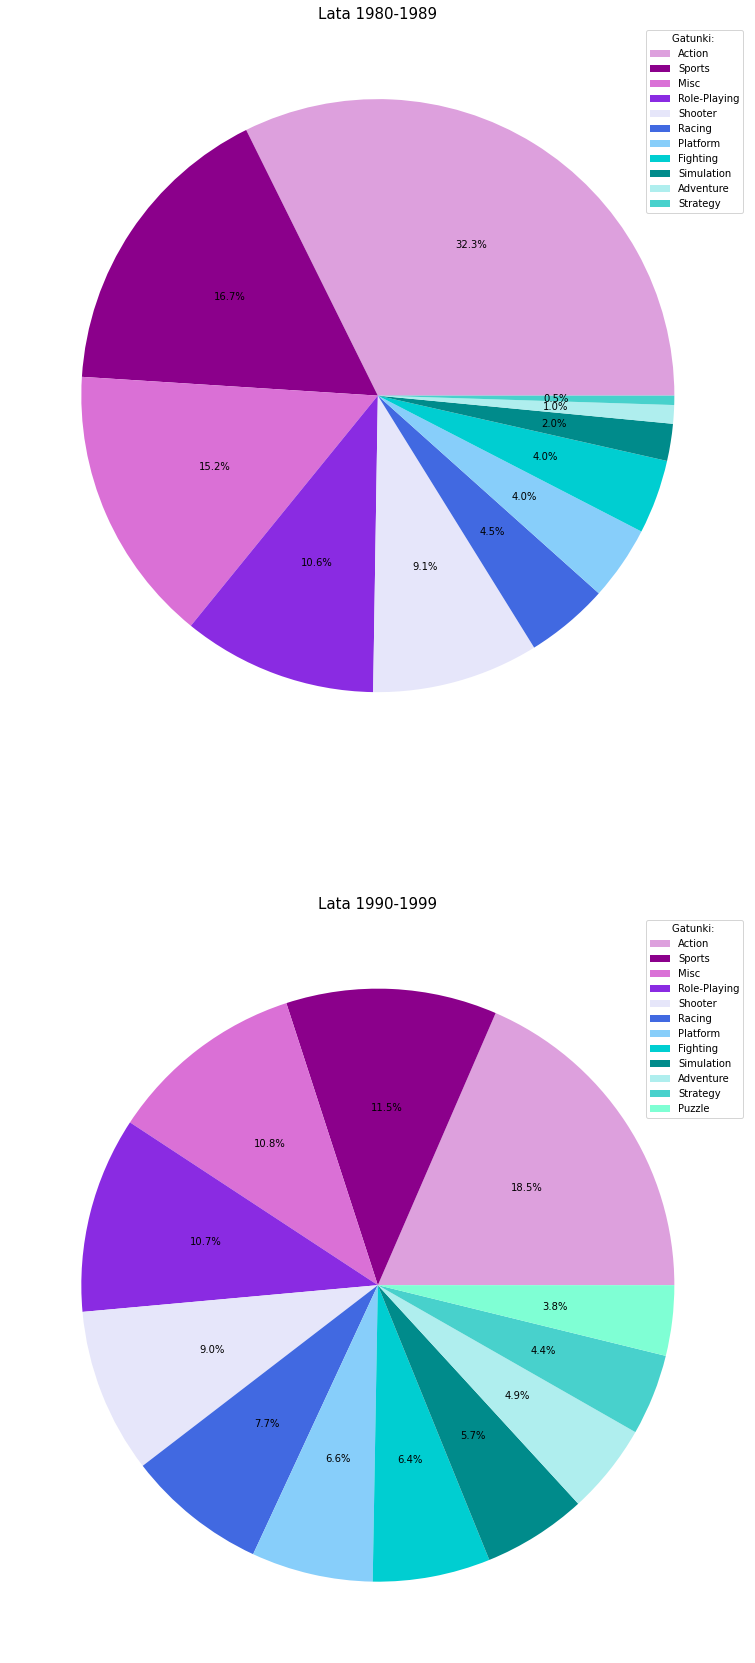

In [28]:
decade1_genre = decade1_frame['Genre'].value_counts()
decade2_genre = decade2_frame['Genre'].value_counts()
decade3_genre = decade3_frame['Genre'].value_counts()
decade4_genre = decade4_frame['Genre'].value_counts()

fig = plt.figure(figsize=(30,30))


ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(decade1_genre,
        colors=('plum','darkmagenta', 'orchid', 'blueviolet', 'lavender', 'royalblue', 'lightskyblue', 
                'darkturquoise', 'darkcyan', 'paleturquoise', 'mediumturquoise', 'aquamarine'), autopct='%1.1f%%'
        )
plt.title('Lata 1980-1989', fontsize='15')

ax2 = plt.subplot2grid((2,2), (1, 0))
plt.pie(decade2_genre,
        colors=('plum','darkmagenta', 'orchid', 'blueviolet', 'lavender', 'royalblue', 'lightskyblue', 
                'darkturquoise', 'darkcyan', 'paleturquoise', 'mediumturquoise', 'aquamarine'), autopct='%1.1f%%')
plt.title('Lata 1990-1999', fontsize='15')




ax1.legend(title= 'Gatunki: ', labels= ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Racing', 
                                         'Platform', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle'],
          loc='upper right')
ax2.legend(title= 'Gatunki: ', labels= ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Racing', 
                                         'Platform', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle'],
          loc='upper right')

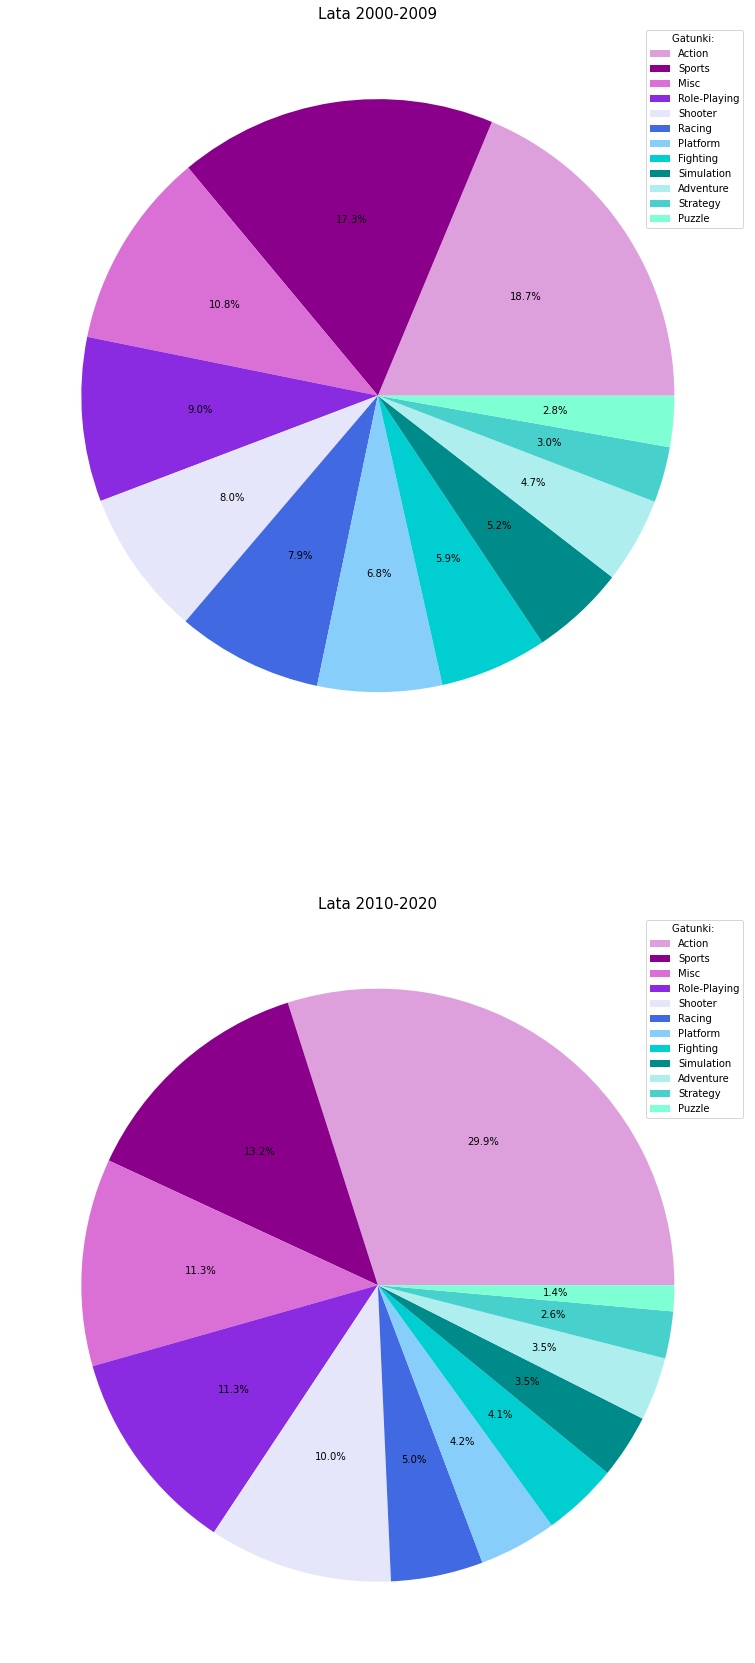

In [29]:
fig = plt.figure(figsize=(30,30))

ax3 = plt.subplot2grid((2,2), (0, 0))
plt.pie(decade3_genre,
        colors=('plum','darkmagenta', 'orchid', 'blueviolet', 'lavender', 'royalblue', 'lightskyblue', 
                'darkturquoise', 'darkcyan', 'paleturquoise', 'mediumturquoise', 'aquamarine'), autopct='%1.1f%%')
plt.title('Lata 2000-2009', fontsize='15')


ax4 = plt.subplot2grid((2,2), (1, 0))
plt.pie(decade4_genre,
        colors=('plum','darkmagenta', 'orchid', 'blueviolet', 'lavender', 'royalblue', 'lightskyblue', 
                'darkturquoise', 'darkcyan', 'paleturquoise', 'mediumturquoise', 'aquamarine'), autopct='%1.1f%%')
plt.title('Lata 2010-2020', fontsize='15')

ax3.legend(title= 'Gatunki: ', labels= ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Racing', 
                                         'Platform', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle'],
          loc='upper right')
ax4.legend(title= 'Gatunki: ', labels= ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Racing', 
                                         'Platform', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle'],
          loc='upper right')

#### Powyższe wykresy obrazują procentowy podział gatunków gier wydawanych w każdej dekadzie. Dwoma niezmiennie dominującymi gatunkami w latach 1980-2020 były gry akcji oraz sportowe. Zauważyć również można, że w pierwszej dekadzie (1980-1989) nie występują gry z gatunku puzzle. Patrząc na wykresy można także odnotować znaczne zwiększenie udziału procentowego gier z gatunków strategicznych i przygodowych, których mimo to wydano najmniej w każdej dekadzie. 

## Analiza platform

### Legenda platform
> Wii - Nintendo Wii  
> NES - Nintendo Entertainment System  
> GB - Gameboy  
> DS - Nintendo DS  
> X360 - Xbox 360  
> PS3 - PlayStation 3  
> PS2 - PlayStation 2  
> SNES - Super Nintendo Entertainment System  
> GBA - Gameboy Advance  
> 3DS - Nintendo DS 3  
> PS4 - PlayStation 4  
> N64 - Nintendo 64  
> PS - Play Station  
> XB - Xbox  
> PC - Komputer  
> PSP - PlayStation Portable  
> XOne - Xbox One  
> GC - GameCube  
> WiiU - Nintendo Wii U  
> GEN - Sega Genesis  
> DC - DreamCast  
> PSV - PlayStation Vita  
> SAT - Sega Saturn  
> SCD - Sega CD  
> WS - WonderSwan  
> NG - NeoGeo  
> 2600 - Atari 2600

In [30]:
platform_count = sales_frame['Platform'].value_counts()
platform_count

PS2     1526
DS      1168
PS3     1003
X360     982
Wii      931
PS       916
PSP      561
XB       524
GBA      487
GC       345
PC       303
3DS      286
N64      262
PS4      217
SNES     193
PSV      161
XOne     153
2600     113
SAT      109
WiiU      99
NES       96
GB        92
DC        34
GEN       17
NG         6
WS         5
SCD        2
TG16       1
Name: Platform, dtype: int64

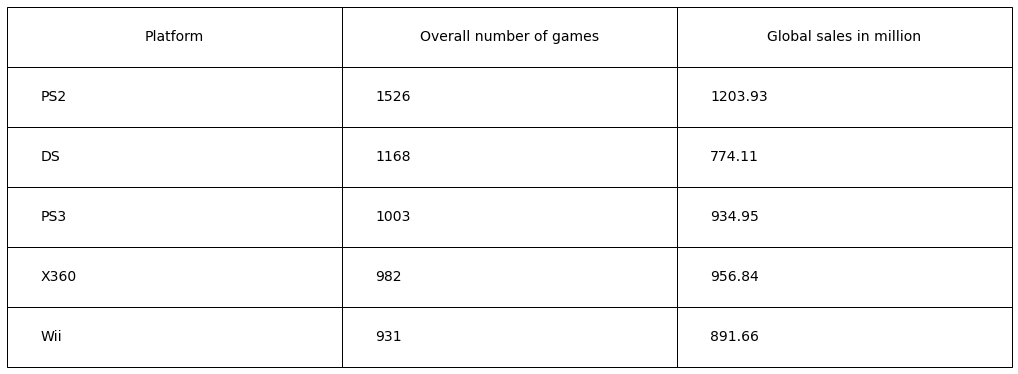

In [31]:
platform_count = sales_frame['Platform'].value_counts().head(5)
platform_type = ['PS2', 'DS', 'PS3', 'X360', 'Wii']
ps2_sales = sales_frame[sales_frame['Platform'] == 'PS2']['Global_Sales_Mln'].sum().round(decimals=2)
ds_sales = sales_frame[sales_frame['Platform'] == 'DS']['Global_Sales_Mln'].sum().round(decimals=2)
ps3_sales = sales_frame[sales_frame['Platform'] == 'PS3']['Global_Sales_Mln'].sum().round(decimals=2)
x360_sales = sales_frame[sales_frame['Platform'] == 'X360']['Global_Sales_Mln'].sum().round(decimals=2)
wii_sales = sales_frame[sales_frame['Platform'] == 'Wii']['Global_Sales_Mln'].sum().round(decimals=2)

platform_data = {'Platform': platform_type,
              'Overall number of games': platform_count,
                 'Global sales in million': [ps2_sales, ds_sales, ps3_sales, x360_sales, wii_sales]
                 }

platform_frame = pd.DataFrame(platform_data)


ax = plt.subplot()
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=platform_frame.values, colLabels=platform_frame.columns, loc='center', cellLoc='left')
table.scale(3,5)
table.set_fontsize(14)

plt.show()

#### Powyższa tabela przedstawia 5 platform na które wydano najwięcej gier. Największą liczbę gier wydano na platformę PlayStation 2, jest to również platforma z największym zyskiem ze sprzedaży globalnej. Jak można zauważyć większa liczba gier nie świadczy o wyższym zarobku. Xbox 360 przyniósł większy zysk przy mniejszej ilości wydanych gier w porównaniu z Nintendo DS, które w rankingu liczebności wydanych gier jest wyżej. Poniższe wykresy ukazują zarobki platform według regionów.

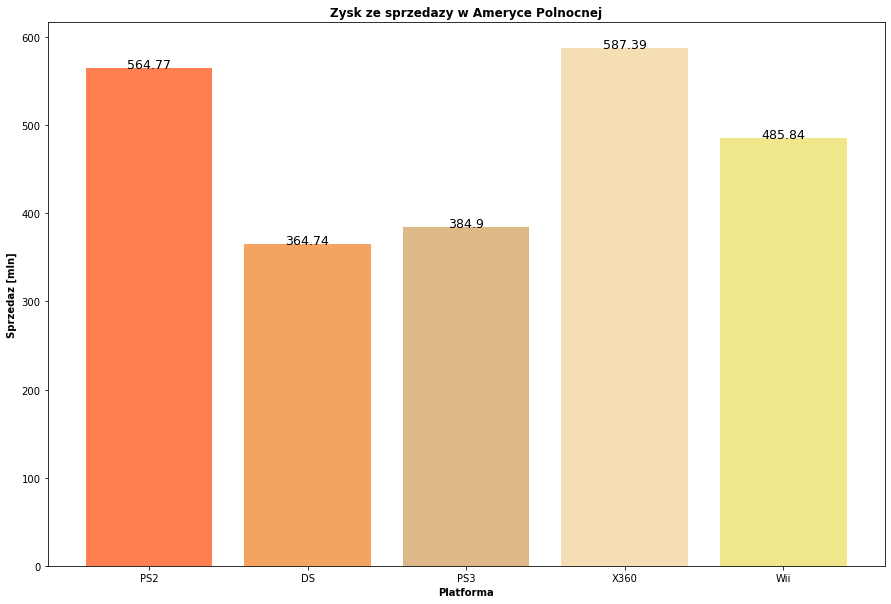

In [32]:
ps2_na = sales_frame[sales_frame['Platform'] == 'PS2']['NA_Sales_Mln'].sum().round(decimals=2)
ds_na = sales_frame[sales_frame['Platform'] == 'DS']['NA_Sales_Mln'].sum().round(decimals=2)
ps3_na = sales_frame[sales_frame['Platform'] == 'PS3']['NA_Sales_Mln'].sum().round(decimals=2)
x360_na = sales_frame[sales_frame['Platform'] == 'X360']['NA_Sales_Mln'].sum().round(decimals=2)
wii_na = sales_frame[sales_frame['Platform'] == 'Wii']['NA_Sales_Mln'].sum().round(decimals=2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['PS2', 'DS', 'PS3', 'X360', 'Wii']
    y = [ps2_na, ds_na, ps3_na, x360_na, wii_na]

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['coral', 'sandybrown', 'burlywood', 'wheat', 'khaki'])
addlabels(x,y)
plt.title("Zysk ze sprzedazy w Ameryce Polnocnej", fontweight='bold')
plt.xlabel("Platforma", fontweight='bold')
plt.ylabel("Sprzedaz [mln]", fontweight='bold')

plt.show()

#### W regionie Ameryki Północnej największy zysk osiągnęła platforma Xbox 360, niewiele mniej jednak osiągnęło PlayStation 2. Wynik jaki osiągnęła platforma Xbox 360 może wynikać z tego iż konsola ta została wyprodukowana przez amerykańską firmę Microsoft. Na wykresie można również zauważyć, że różnica w przychodzie Nintendo DS oraz PlayStation 3 jest niewielka tak jak w przypadku Xbox 360 i PlaySatation 2. 

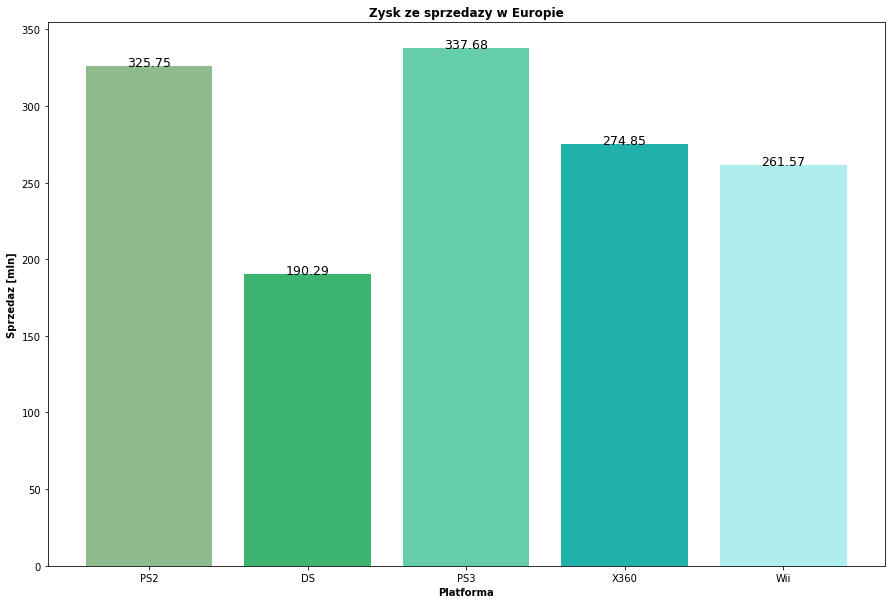

In [33]:
ps2_eu = sales_frame[sales_frame['Platform'] == 'PS2']['EU_Sales_Mln'].sum().round(decimals=2)
ds_eu = sales_frame[sales_frame['Platform'] == 'DS']['EU_Sales_Mln'].sum().round(decimals=2)
ps3_eu = sales_frame[sales_frame['Platform'] == 'PS3']['EU_Sales_Mln'].sum().round(decimals=2)
x360_eu = sales_frame[sales_frame['Platform'] == 'X360']['EU_Sales_Mln'].sum().round(decimals=2)
wii_eu = sales_frame[sales_frame['Platform'] == 'Wii']['EU_Sales_Mln'].sum().round(decimals=2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['PS2', 'DS', 'PS3', 'X360', 'Wii']
    y = [ps2_eu, ds_eu, ps3_eu, x360_eu, wii_eu]

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['darkseagreen', 'mediumseagreen', 'mediumaquamarine', 'lightseagreen', 'paleturquoise'])
addlabels(x,y)
plt.title("Zysk ze sprzedazy w Europie", fontweight='bold')
plt.xlabel("Platforma", fontweight='bold')
plt.ylabel("Sprzedaz [mln]", fontweight='bold')

plt.show()

#### Na powyższym wykresie można zauważyć, że zyski platform są na zbliżonym poziomie. Jedynym wyjątkiem jest platforma Nintendo DS, która przyniosła prawie dwukrotnie mniejszy zysk niż Playstation 3. W porównaniu z zyskami Ameryki Północnej zauważyć można, że w regionie Europy również PlayStation 2 ma drugi najwyższy dochód.

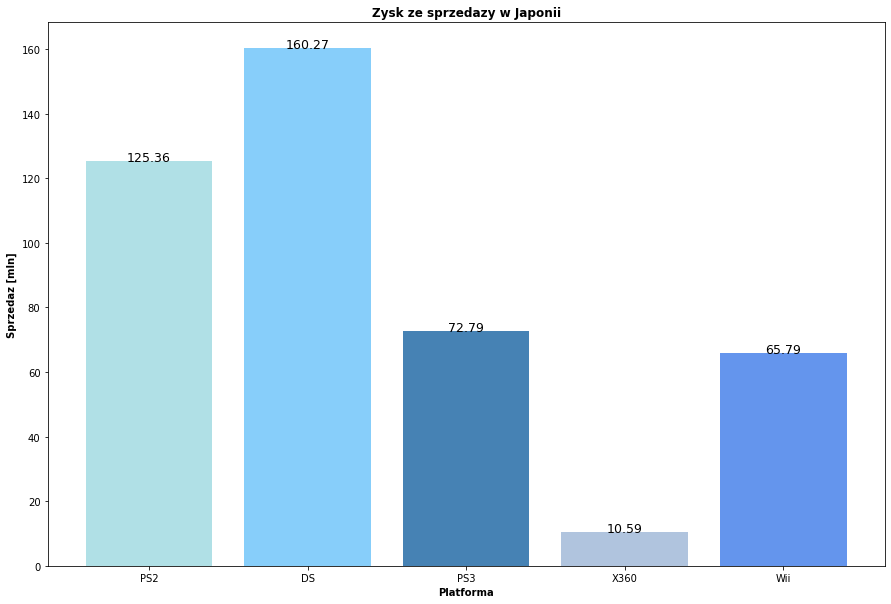

In [34]:
ps2_jp = sales_frame[sales_frame['Platform'] == 'PS2']['JP_Sales_Mln'].sum().round(decimals=2)
ds_jp = sales_frame[sales_frame['Platform'] == 'DS']['JP_Sales_Mln'].sum().round(decimals=2)
ps3_jp = sales_frame[sales_frame['Platform'] == 'PS3']['JP_Sales_Mln'].sum().round(decimals=2)
x360_jp = sales_frame[sales_frame['Platform'] == 'X360']['JP_Sales_Mln'].sum().round(decimals=2)
wii_jp = sales_frame[sales_frame['Platform'] == 'Wii']['JP_Sales_Mln'].sum().round(decimals=2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', fontsize='12.5')
        
if __name__ == '__main__':
    x = ['PS2', 'DS', 'PS3', 'X360', 'Wii']
    y = [ps2_jp, ds_jp, ps3_jp, x360_jp, wii_jp]

plt.figure(figsize = (15, 10))
plt.bar(x,y, color=['powderblue', 'lightskyblue', 'steelblue', 'lightsteelblue', 'cornflowerblue'])
addlabels(x,y)
plt.title("Zysk ze sprzedazy w Japonii", fontweight='bold')
plt.xlabel("Platforma", fontweight='bold')
plt.ylabel("Sprzedaz [mln]", fontweight='bold')

plt.show()

#### W regionie Japonii najwyższy zysk odnotowała japońska platforma Nintendo DS - 160.270.000, która przebiła amerykańską konsolę Xbox 360 prawie 16 krotnie. Niewiele mniejszy zysk przyniosła platforma PlayStation 2, która również w tym regionie znajduje się na drugim miejscu pod względem zysków. Zbliżony przychód uzyskały platformy PlayStation 3 i Nintendo Wii.